**Notices**

Copyright (c) 2019 Intel Corporation.

Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files (the
"Software"), to deal in the Software without restriction, including
without limitation the rights to use, copy, modify, merge, publish,
distribute, sublicense, and/or sell copies of the Software, and to
permit persons to whom the Software is furnished to do so, subject to
the following conditions:

The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF
MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE
LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION
OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION
WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


# Image Processing and Data Augmentation Methods

## Objective

Understand ways to find a data set and to prepare a data set for machine learning and training.

## Activities 
**In this section of the training you will**
- Image Preprocessing Techniques
- Data Augmentation Techniques

As you follow this notebook, complete **Activity** sections to finish this workload. 


## Find a Data set

Artificial intelligence projects depend upon data. When beginning a project, data scientists look for existing data sets that are similar to or match the given problem. This saves time and money, and leverages the work of others, building upon the body of knowledge for all future projects. 

Typically you begin with a search engine query. For this project, we were looking for a data set with an unencumbered license.

This project starts with [Vehicle Make and Model Recognition Dataset (VMMRdb)](http://vmmrdb.cecsresearch.org/)   which is large in scale and diversity, containing 9,170 classes consisting of 291,752 images, covering models manufactured between 1950 to 2016. VMMRdb dataset contains images that were taken by different users, different imaging devices, and multiple view angles, ensuring a wide range of variations to account for various scenarios that could be encountered in a real-life scenario. The cars are not well aligned, and some images contain irrelevant background. The data covers vehicles from 712 areas covering all 412 sub-domains corresponding to US metro areas. VMMRdb dataset can be used as a baseline for training a robust model in several real-life scenarios for traffic surveillance. 

## Part 1: Image Preprocessing
### 1.1 Inspect Channels

The images are usually stored in an RGB (Red Green Blue) format. In this format the image is represented as a three-dimensional (or three-channel) array. Now, we will take a look at three different channels individually for a random image. 

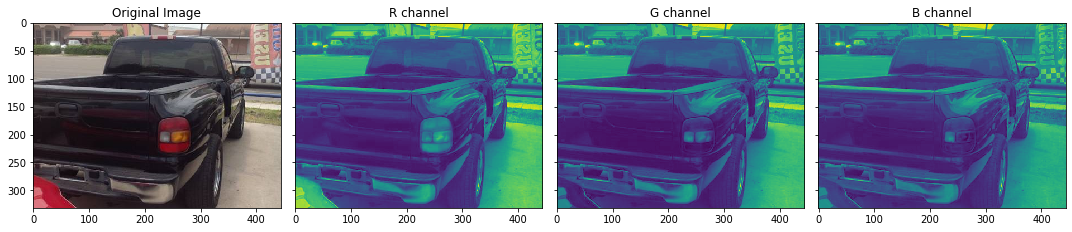

In [1]:
#Inspect R, G, B Channels indivudally
import glob, random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

file_list = glob.glob("../Dataset/SubsetVMMR/*/*")
img_path = random.choice(file_list)
image = mpimg.imread(img_path)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize = (15,15))

#Original Image
axes[0].set_title('Original Image')
axes[0].imshow(image)
# R channel
axes[1].set_title('R channel')
axes[1].imshow(image[:, :, 0])
# G channel.
axes[2].set_title('G channel')
axes[2].imshow(image[:, :, 1])
# B channel.
axes[3].set_title('B channel')
axes[3].imshow(image[:, :, 2])

plt.setp([axes[1].get_yticklabels()], visible=False)
plt.setp([axes[2].get_yticklabels()], visible=False)
plt.setp([axes[3].get_yticklabels()], visible=False)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

### 1.2 RGB-BGR Conversion

Due to the underlying OpenCV implementation of imread, in some of the neural network topologies we need to convert an image from RGB to BGR format. 

**Activity**

If RGB is represented (0,1,2), how to represent it in BGR? BGR=> (2,1,0)

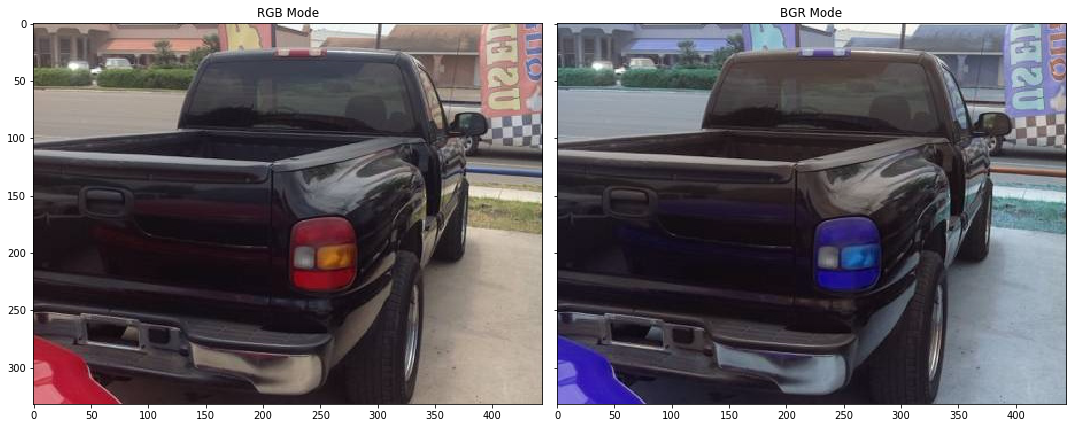

In [2]:
#Plot in RGB & BGR Mode
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,15))

#Image in RGB
axes[0].set_title('RGB Mode')
axes[0].imshow(image)
#Image in BGR
axes[1].set_title('BGR Mode')
axes[1].imshow(image[:, :, (2,1,0)])


plt.setp([axes[1].get_yticklabels()], visible=False)

fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

### 1.3 Rescaling

Rescaling is an operation that moves your data from one numerical range to another by simple division using a predefined constant. In deep neural networks you might want to restrict your input to the range from 0 to 1, due to possible overflow, optimization, stability issues, and so on.

We use the Keras ImageDataGenerator  class, which allows us to do all transformations on the fly

In [3]:
#Rescale Images
import os
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np 

img_height, img_width = 299, 299
train_path = "../Dataset/" + "SubsetVMMR/"
def compare_images(img1, img2, Title1="Original", Title2 ="Transformed", scale_option=False):
    if type(img1) == np.ndarray:
        img1 = array_to_img(img1, scale=scale_option)
    if type(img2) == np.ndarray:
        img2 = array_to_img(img2, scale=scale_option)
    plt.figure(figsize=(14, 6))
    plt.subplot(121)
    plt.imshow(img1)
    plt.axis("off")
    plt.title(Title1, fontsize=18)
    plt.subplot(122)
    plt.imshow(img2)
    plt.axis("off")
    plt.title(Title2, fontsize=18)
#Rescale colors
datagen_rescaled = ImageDataGenerator(rescale=1. / 255.)
datagen_default = ImageDataGenerator()

gen_default = datagen_default.flow_from_directory(train_path, 
                                                  target_size=(img_height, img_width), 
                                                  batch_size=1, 
                                                  shuffle=False, 
                                                  class_mode=None)
gen_rescaled = datagen_rescaled.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=1, 
                                                    shuffle=False, 
                                                    class_mode=None)

sample_default = next(gen_default)
sample_rescaled = next(gen_rescaled)

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

Found 5925 images belonging to 53 classes.
Found 5925 images belonging to 53 classes.


By rescaling an image, we are dividing each pixel with 255 and having a look at the transformed array representations helps you understand your transformations. The **scale_option** parameter helps you understand the image transformation better. It's default value is set to **False** and hence you can see the difference. If you change it **True**, you will see that two images are the same since **array_to_img** module rescales it back to original image. 

[array([[131., 158.],
        [139., 140.]], dtype=float32), array([[0.5137255 , 0.61960787],
        [0.54509807, 0.54901963]], dtype=float32)]

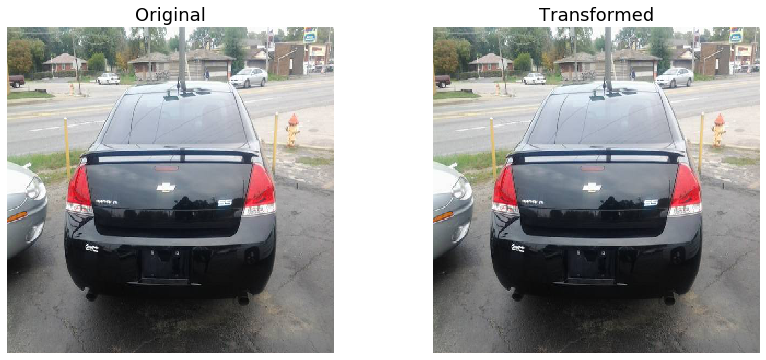

In [4]:
#Plot images to make comparison
compare_images(sample_default[0], sample_rescaled[0], scale_option = True)
#Check the Arrays to see the difference
[sample_default[0][:2, :2, 0], sample_rescaled[0][:2, :2, 0]]

### 1.4 Grayscaling

Grayscaling turns a color RGB image into images with only shades of gray representing colors. This pair of transformations can throw away noisy pixels and detect shapes in the picture. Nowadays, all these operations are learned through convolutional neural networks. 

Found 5925 images belonging to 53 classes.


[array([[131., 158.],
        [139., 140.]], dtype=float32), array([[134., 161.],
        [142., 143.]], dtype=float32)]

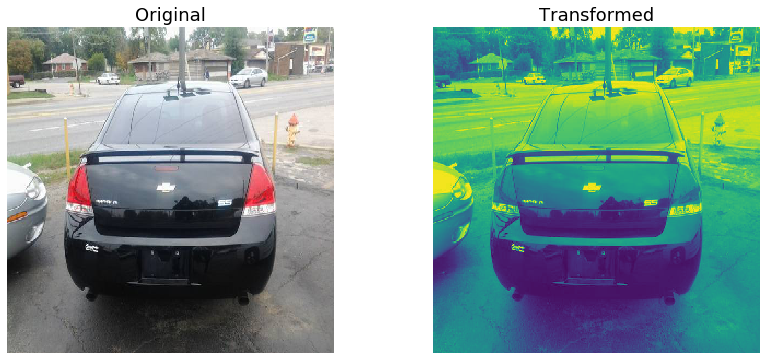

In [5]:
#Image Grayscaling
gen_grayscaled = datagen_default.flow_from_directory(train_path, 
                                                     target_size=(img_height, img_width), 
                                                     batch_size=1, 
                                                     shuffle=False, 
                                                     class_mode=None, 
                                                     color_mode="grayscale")
sample_grayscaled = next(gen_grayscaled)
compare_images(sample_default[0], sample_grayscaled[0])
#Check the Arrays to see the difference
[sample_default[0][:2, :2, 0], sample_grayscaled[0][:2, :2, 0]]

### 1.5 Samplewise centering (across features inside one sample)

We’ve already seen that raw data values are from 0 to 255. So, one sample is a 3D array of numbers from 0 to 255. Following the optimization stability considerations (get rid of vanishing or saturating values problems) we might want to normalize the dataset such that the mean value of each data sample would be equal to 0.

By looking at the the following values we can understand it a better:

np.mean(sample_samplewise_mean[0][:,:,i]) where i = 0,1,2 and overall sum would be equal to zero. 

Found 5925 images belonging to 53 classes.


[array([[131., 158.],
        [139., 140.]], dtype=float32), array([[ 2.8775024, 29.877502 ],
        [10.877502 , 11.877502 ]], dtype=float32)]

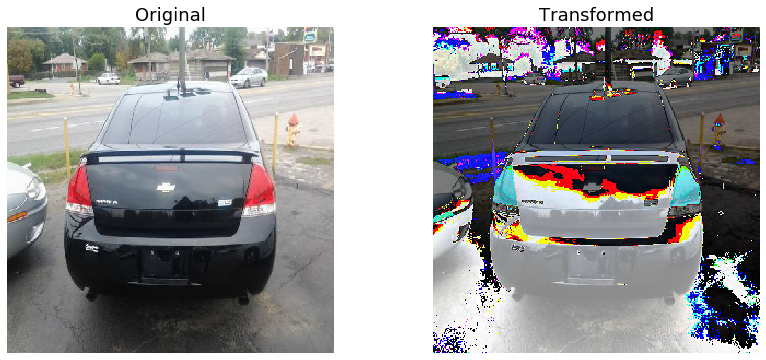

In [6]:
#Samplewise centering 
datagen_samplewise_mean = ImageDataGenerator(samplewise_center=True)
gen_samplewise_mean = datagen_samplewise_mean.flow_from_directory(train_path, 
                                                                  target_size=(img_height, img_width), 
                                                                  batch_size=1, 
                                                                  shuffle=False,  
                                                                  class_mode=None)
sample_samplewise_mean = next(gen_samplewise_mean)
compare_images(sample_default[0], sample_samplewise_mean[0])
#Check the Arrays to see the difference
[sample_default[0][:2, :2, 0], sample_samplewise_mean[0][:2, :2, 0]]

### 1.6 Samplewise std normalization (across features inside one sample)

This preprocessing step follows the same idea as samplewise centering, but instead of setting the mean value to 0, it sets the standard deviation value to 1.

**Activity**

Set **samplewise_std_normalization** to True to create your generator. 

/usr/local/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:355: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 5925 images belonging to 53 classes.


[array([[131., 158.],
        [139., 140.]], dtype=float32), array([[0.0421089 , 0.43722245],
        [0.15917958, 0.17381342]], dtype=float32)]

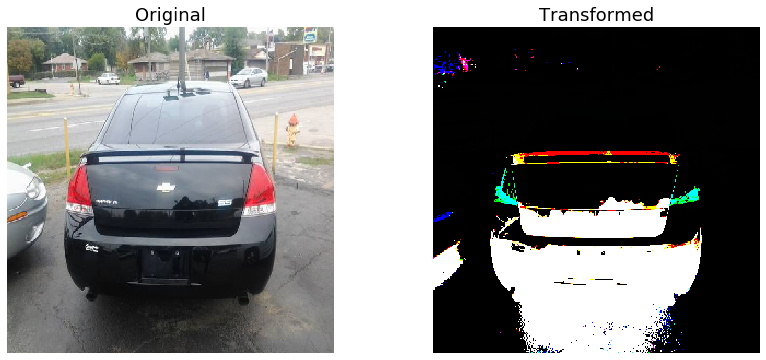

In [7]:
#Sampliwse std normalization
datagen_samplewise_std = ImageDataGenerator(samplewise_std_normalization=True)
gen_samplewise_std = datagen_samplewise_std.flow_from_directory(train_path, 
                                                                target_size=(img_height, img_width), 
                                                                batch_size=1, 
                                                                shuffle=False, 
                                                                class_mode=None)
sample_samplewise_std = next(gen_samplewise_std)
compare_images(sample_default[0], sample_samplewise_std[0])
#Check the Arrays to see the difference
[sample_default[0][:2, :2, 0], sample_samplewise_std[0][:2, :2, 0]]

## Part 2: Data Augmentation Techniques

In this section, we’re going to look at more data-dependent transformations, which explicitly use the graphical nature of data. These kinds of transformations are often used for data augmentation procedures.

### 2.1 Rotation

This transformation rotates the image in a certain direction (clockwise or counterclockwise).

**Activity**

Change **rotation_range** to a degree of your choice so that the image will be rotated with that degree in clockwise direction. Example: rotation_range = 45

Found 5925 images belonging to 53 classes.


[array([[131., 158.],
        [139., 140.]], dtype=float32), array([[0., 0.],
        [0., 0.]], dtype=float32)]

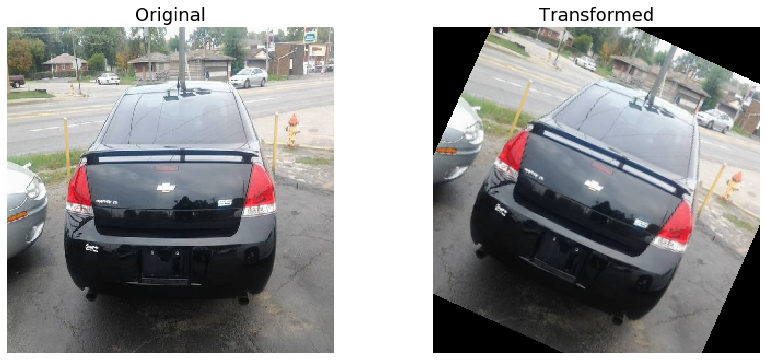

In [8]:
#Image Rotation
datagen_rotated = ImageDataGenerator(rotation_range=45, fill_mode="constant")
gen_rotated = datagen_rotated.flow_from_directory(train_path, 
                                                  target_size=(img_height, img_width), 
                                                  batch_size=1, 
                                                  shuffle=False, 
                                                  class_mode=None)
sample_rotated = next(gen_rotated)
compare_images(sample_default[0], sample_rotated[0])
#Check the Arrays to see the difference
[sample_default[0][:2, :2, 0], sample_rotated[0][:2, :2, 0]]

### 2.2 Horizontal & Vertical Shift

This technique can shift an image horizontally or vertically.

Found 5925 images belonging to 53 classes.
Found 5925 images belonging to 53 classes.


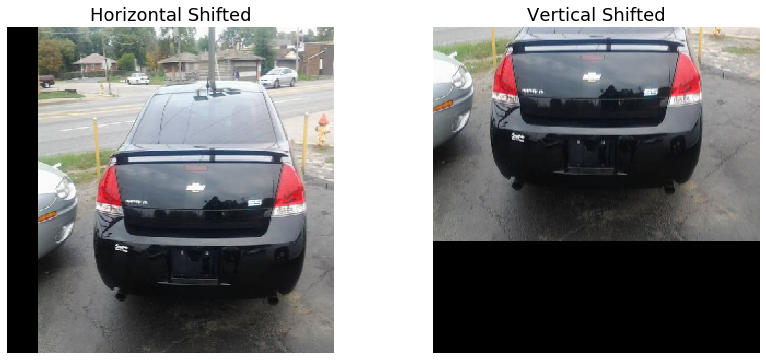

In [9]:
#Horizontal and Vertical Shift
datagen_hshifted = ImageDataGenerator(width_shift_range=0.4, fill_mode="constant")
datagen_vshifted = ImageDataGenerator(height_shift_range=0.4, fill_mode="constant")

gen_hshifted = datagen_hshifted.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=1, 
                                                    shuffle=False, 
                                                    class_mode=None)
gen_vshifted = datagen_vshifted.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=1, 
                                                    shuffle=False, 
                                                    class_mode=None)
sample_hshifted = next(gen_hshifted)
sample_vshifted = next(gen_vshifted)
compare_images(sample_hshifted[0], sample_vshifted[0], Title1="Horizontal Shifted", Title2="Vertical Shifted")

### 2.3 Horizontal & Vertical Flip

With this method, we can flip an image both ways.

**Activity** 

Create generators. Example: 

datagen_hflipped = ImageDataGenerator(horizontal_flip=True)

datagen_vflipped = ImageDataGenerator(vertical_flip=True)

Found 5925 images belonging to 53 classes.
Found 5925 images belonging to 53 classes.


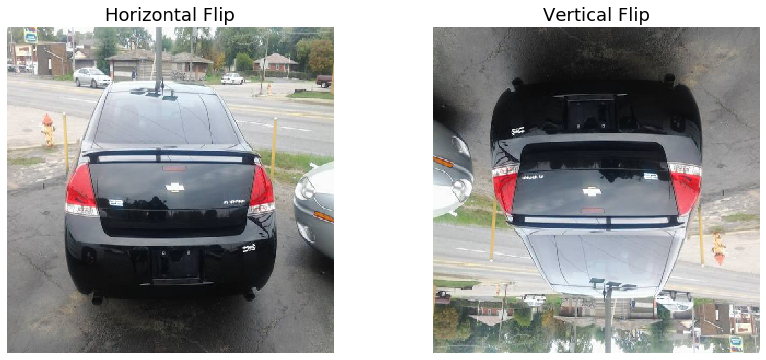

In [10]:
#Horizontal and Vertical Flip
datagen_hflipped = ImageDataGenerator(horizontal_flip=True)
datagen_vflipped = ImageDataGenerator(vertical_flip=True)

gen_hflipped = datagen_hflipped.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=1, 
                                                    shuffle=False, 
                                                    class_mode=None)
gen_vflipped = datagen_vflipped.flow_from_directory(train_path, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=1, 
                                                    shuffle=False, 
                                                    class_mode=None)
sample_hflipped = next(gen_hflipped)
sample_vflipped = next(gen_vflipped)
compare_images(sample_hflipped[0], sample_vflipped[0], Title1="Horizontal Flip", Title2="Vertical Flip")

### 2.4 Zoom & Shearing

You can zoom in an image or do shearing which displaces each point in a direction by an amount proportional to its distance from an edge of the image.

Found 5925 images belonging to 53 classes.
Found 5925 images belonging to 53 classes.


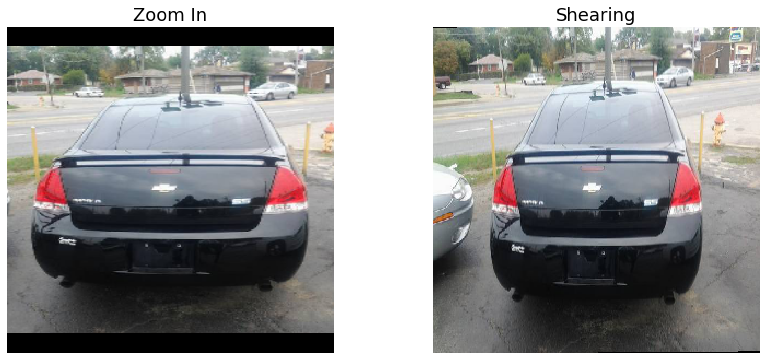

In [11]:
#Zoom in and Shearing 
datagen_sheared = ImageDataGenerator(shear_range=0.75, fill_mode="constant")
datagen_zoomed = ImageDataGenerator(zoom_range=0.5, fill_mode="constant")

gen_sheared = datagen_sheared.flow_from_directory(train_path, 
                                                  target_size=(img_height, img_width), 
                                                  batch_size=1, 
                                                  shuffle=False, 
                                                  class_mode=None)
gen_zoomed = datagen_zoomed.flow_from_directory(train_path, 
                                                target_size=(img_height, img_width), 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode=None)
sample_sheared = next(gen_sheared)
sample_zoomed = next(gen_zoomed)
compare_images(sample_zoomed[0], sample_sheared[0], Title1="Zoom In", Title2="Shearing")

### 2.5 Combination

It's possible to apply all these image transformation techniques at once and create new data samples. 

Dataset


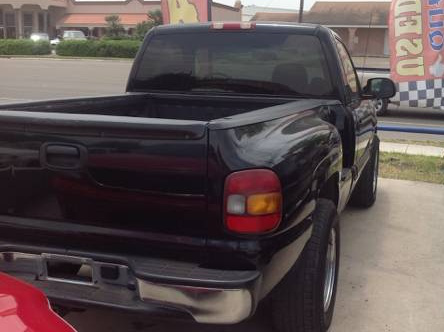

In [12]:
#Select a random image and follow the next step
datagen = ImageDataGenerator(rotation_range=45, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             shear_range=0.2, 
                             zoom_range=0.3, 
                             horizontal_flip=True, 
                             vertical_flip=True, 
                             fill_mode="nearest")
#Load example image
img = load_img(img_path)
print(img_path.split("/")[1])
img

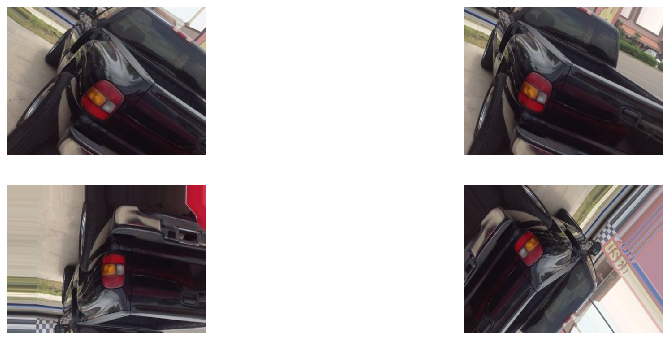

In [13]:
#Apply different augmentation techniques
img = img_to_array(img)
img = img.reshape((1,) + img.shape)
n_augmentations = 4
plt.figure(figsize=(15, 6))    
i = 0

for batch in datagen.flow(img, 
                          batch_size=1, 
                          seed=21):
    
    plt.subplot(2, int(np.ceil(n_augmentations * 1. / 2)), i + 1)
    plt.imshow(array_to_img(batch[0]))
    plt.axis("off")
    
    i += 1
    if i >= n_augmentations:
        break

## Resources

TensorFlow* Optimizations on Modern Intel® Architecture, https://software.intel.com/en-us/articles/tensorflow-optimizations-on-modern-intel-architecture

Intel Optimized TensorFlow Wheel Now Available, https://software.intel.com/en-us/articles/intel-optimized-tensorflow-wheel-now-available

Build and Install TensorFlow* on Intel® Architecture, https://software.intel.com/en-us/articles/build-and-install-tensorflow-on-intel-architecture

TensorFlow, https://www.tensorflow.org/

## Case Studies

Manufacturing Package Fault Detection Using Deep Learning, https://software.intel.com/en-us/articles/manufacturing-package-fault-detection-using-deep-learning

Automatic Defect Inspection Using Deep Learning for Solar Farm, https://software.intel.com/en-us/articles/automatic-defect-inspection-using-deep-learning-for-solar-farm

## Citations

A Large and Diverse Dataset for Improved Vehicle Make and Model Recognition
F. Tafazzoli, K. Nishiyama and H. Frigui
In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR) Workshops 2017. 
